## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [1]:
#Import preprocessed data
import pandas as pd
import numpy as np
from functions import get_error_scores, display_results_sample, find_best_regression_model

#Independant variable training data
X_train = pd.read_csv("../data/preprocessed/X_train_scaled.csv")
X_train = X_train.drop(columns=["Unnamed: 0"])
print(f"X_train shape: {X_train.shape}")

#Target training data
y_train = pd.read_csv("../data/preprocessed/y_train.csv")
y_train = y_train.drop(columns=["Unnamed: 0"])
print(f"y_train shape: {y_train.shape}")

#Independant variable test data
X_test = pd.read_csv("../data/preprocessed/X_test_scaled.csv")
X_test = X_test.drop(columns=["Unnamed: 0"])
print(f"X_test shape: {X_test.shape}")

#Target test data
y_test = pd.read_csv("../data/preprocessed/y_test.csv")
y_test = y_test.drop(columns=["Unnamed: 0"])
print(f"y_test shape: {y_test.shape}")


X_train shape: (3381, 34)
y_train shape: (3381, 1)
X_test shape: (1450, 34)
y_test shape: (1450, 1)


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [2]:
# Train our Linear Regression model
from sklearn.linear_model import LinearRegression

#Define model
reg = LinearRegression()
reg.fit(X_train, y_train)

#Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

get_error_scores (y_train, y_train_pred, y_test, y_test_pred)


R SQUARED
	Train R²:	0.737
	Test R²:	0.7367
MEAN AVERAGE ERROR
	Train MAE:	69490.23
	Test MAE:	68001.21
ROOT MEAN SQUARED ERROR
	Train RMSE:	93783.35
	Test RMSE:	95155.57

10 Randomly selected results.
Index: 1311 	- 	Prediction: $297,868 	Actual: $359,900 	Difference: -62,032, 20.83%
Index: 5 	- 	Prediction: $81,821 	Actual: $200,000 	Difference: -118,179, 144.44%
Index: 639 	- 	Prediction: $243,611 	Actual: $169,900 	Difference: 73,711, -30.26%
Index: 436 	- 	Prediction: $281,179 	Actual: $310,000 	Difference: -28,821, 10.25%
Index: 716 	- 	Prediction: $227,201 	Actual: $154,000 	Difference: 73,201, -32.22%
Index: 858 	- 	Prediction: $405,799 	Actual: $385,000 	Difference: 20,799, -5.13%
Index: 336 	- 	Prediction: $384,590 	Actual: $330,000 	Difference: 54,590, -14.19%
Index: 677 	- 	Prediction: $210,598 	Actual: $197,000 	Difference: 13,598, -6.46%
Index: 1242 	- 	Prediction: $473,406 	Actual: $340,000 	Difference: 133,406, -28.18%
Index: 657 	- 	Prediction: $292,454 	Actual: $210,0

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Create 2nd degree polynomial feature set and train model
poly2 = PolynomialFeatures(degree=2)
Xpoly_train = poly2.fit_transform(X_train)
Xpoly_test = poly2.transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Train our model
reg.fit(Xpoly_train, y_train)
ypoly_train_pred = reg.predict(Xpoly_train)
ypoly_test_pred = reg.predict(Xpoly_test)

get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

Number of polynomial features: 630
R SQUARED
	Train R²:	0.8964
	Test R²:	0.8458
MEAN AVERAGE ERROR
	Train MAE:	44085.13
	Test MAE:	53436.24
ROOT MEAN SQUARED ERROR
	Train RMSE:	58867.57
	Test RMSE:	72830.39

10 Randomly selected results.
Index: 538 	- 	Prediction: $471,616 	Actual: $475,000 	Difference: -3,384, 0.72%
Index: 218 	- 	Prediction: $339,953 	Actual: $370,000 	Difference: -30,047, 8.84%
Index: 1244 	- 	Prediction: $202,694 	Actual: $111,200 	Difference: 91,494, -45.14%
Index: 1224 	- 	Prediction: $386,053 	Actual: $460,000 	Difference: -73,947, 19.15%
Index: 1094 	- 	Prediction: $411,248 	Actual: $487,000 	Difference: -75,752, 18.42%
Index: 281 	- 	Prediction: $505,354 	Actual: $450,000 	Difference: 55,354, -10.95%
Index: 1386 	- 	Prediction: $222,663 	Actual: $260,000 	Difference: -37,337, 16.77%
Index: 307 	- 	Prediction: $308,484 	Actual: $349,500 	Difference: -41,016, 13.3%
Index: 148 	- 	Prediction: $558,046 	Actual: $510,000 	Difference: 48,046, -8.61%
Index: 473 	- 	P

In [4]:
# # Create polynomial feature set and train model
# poly2 = PolynomialFeatures(degree=3)
# Xpoly_train = poly2.fit_transform(X_train)
# Xpoly_test = poly2.transform(X_test)
# print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# # Train our model
# reg.fit(Xpoly_train, y_train)
# ypoly_train_pred = reg.predict(Xpoly_train)
# ypoly_test_pred = reg.predict(Xpoly_test)

# # Check performance on train and test set
# get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

In [5]:
#Use functions to run and score different selected models
from functions import find_best_regression_model
model_finding_results = find_best_regression_model(X_train, X_test, y_train, y_test)

Processing Linear Regression...
Processing Elastic Net...
Processing Decision Tree...
Processing Random Forest...
Processing XGBoost...
Processing LightGBM...
Processing Neural Network...
Processing COMPLETE!


In [6]:
model_finding_results

,R² Score,MSE,MAE,Rank
XGBoost,0.9531,1.611579e+09,22963.05,1
LightGBM,0.9338,2.278161e+09,31591.46,2
Random Forest,0.9239,2.617627e+09,28507.48,3
Decision Tree,0.8362,5.634184e+09,25907.33,4
Neural Network,0.7684,7.963249e+09,62153.00,5
Linear Regression,0.7367,9.054583e+09,68001.21,6
Elastic Net,0.6992,1.034232e+10,70977.65,7


In [7]:
# Train our XG Model model
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(X_train, y_train)

#Get predictions
y_xg_train_pred = xg.predict(X_train)
y_xg_test_pred = xg.predict(X_test)

get_error_scores (y_train, y_xg_train_pred, y_test, y_xg_test_pred)

R SQUARED
	Train R²:	0.9983
	Test R²:	0.9531
MEAN AVERAGE ERROR
	Train MAE:	5168.56
	Test MAE:	22963.05
ROOT MEAN SQUARED ERROR
	Train RMSE:	7505.39
	Test RMSE:	40144.47

10 Randomly selected results.
Index: 1077 	- 	Prediction: $613,814 	Actual: $623,000 	Difference: -9,186, 1.5%
Index: 639 	- 	Prediction: $191,954 	Actual: $169,900 	Difference: 22,054, -11.49%
Index: 259 	- 	Prediction: $210,376 	Actual: $210,000 	Difference: 376, -0.18%
Index: 1400 	- 	Prediction: $237,048 	Actual: $275,000 	Difference: -37,952, 16.01%
Index: 11 	- 	Prediction: $812,053 	Actual: $858,000 	Difference: -45,947, 5.66%
Index: 853 	- 	Prediction: $158,379 	Actual: $155,350 	Difference: 3,029, -1.91%
Index: 36 	- 	Prediction: $170,464 	Actual: $145,000 	Difference: 25,464, -14.94%
Index: 718 	- 	Prediction: $450,846 	Actual: $390,000 	Difference: 60,846, -13.5%
Index: 732 	- 	Prediction: $301,786 	Actual: $305,000 	Difference: -3,214, 1.06%
Index: 827 	- 	Prediction: $616,876 	Actual: $621,000 	Difference

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



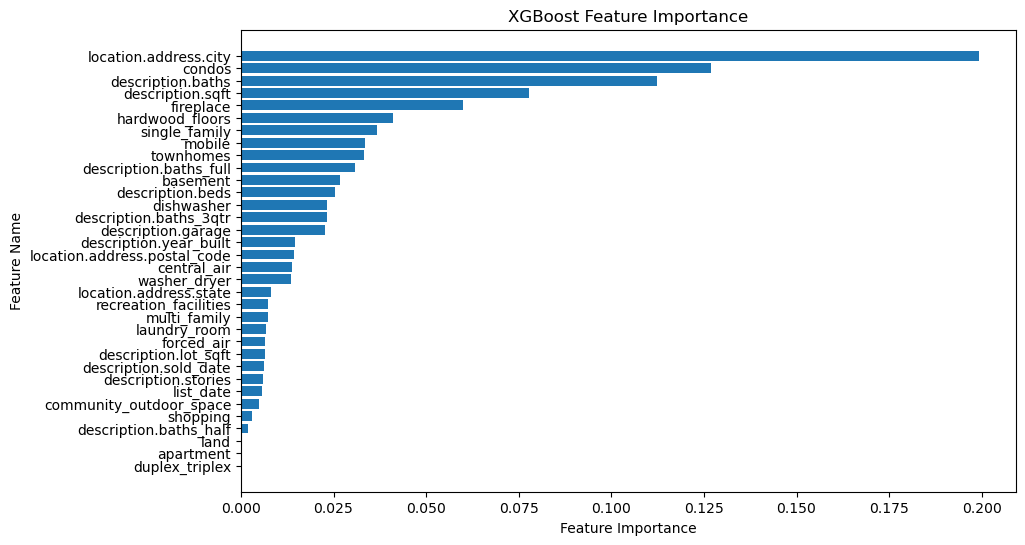

In [8]:
import matplotlib.pyplot as plt

# Get XG feature importance
importances = xg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [9]:
# Filter features above threshold
threshold = 0.02  # Adjustable

selected_features = importances_df[importances_df['Importance'] > threshold]['Feature']
selected_features = selected_features.reset_index(drop=True)

print(f"Selected Features: \n{selected_features}")

Selected Features: 
0      location.address.city
1                     condos
2          description.baths
3           description.sqft
4                  fireplace
5            hardwood_floors
6              single_family
7                     mobile
8                  townhomes
9     description.baths_full
10                  basement
11          description.beds
12                dishwasher
13    description.baths_3qtr
14        description.garage
Name: Feature, dtype: object


In [10]:
# Reduce dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Send datasets to CSV
X_train_selected.to_csv('../data/processed/X_train_selected.csv')
X_test_selected.to_csv('../data/processed/X_test_selected.csv')

In [11]:
#Fit model to selected 10 features
xg_selected = XGBRegressor()
xg_selected.fit(X_train_selected, y_train)

y_test_pred_selected = xg_selected.predict(X_test_selected)
y_train_pred_selected = xg_selected.predict(X_train_selected)

from sklearn.metrics import mean_squared_error, r2_score
print("R² Score:", round(r2_score(y_test, y_test_pred_selected),4))
print("MSE:", mean_squared_error(y_test, y_test_pred_selected))

get_error_scores (y_train, y_train_pred_selected, y_test, y_test_pred_selected)

R² Score: 0.9008
MSE: 3410691328.0
R SQUARED
	Train R²:	0.9887
	Test R²:	0.9008
MEAN AVERAGE ERROR
	Train MAE:	13558.3
	Test MAE:	38135.79
ROOT MEAN SQUARED ERROR
	Train RMSE:	19453.86
	Test RMSE:	58401.12

10 Randomly selected results.
Index: 1245 	- 	Prediction: $331,248 	Actual: $332,500 	Difference: -1,252, 0.38%
Index: 831 	- 	Prediction: $313,657 	Actual: $312,000 	Difference: 1,657, -0.53%
Index: 222 	- 	Prediction: $688,794 	Actual: $670,000 	Difference: 18,794, -2.73%
Index: 332 	- 	Prediction: $312,410 	Actual: $359,500 	Difference: -47,090, 15.07%
Index: 1197 	- 	Prediction: $108,612 	Actual: $120,000 	Difference: -11,388, 10.49%
Index: 324 	- 	Prediction: $413,035 	Actual: $441,000 	Difference: -27,965, 6.77%
Index: 1208 	- 	Prediction: $257,203 	Actual: $210,000 	Difference: 47,203, -18.35%
Index: 466 	- 	Prediction: $351,807 	Actual: $405,000 	Difference: -53,193, 15.12%
Index: 952 	- 	Prediction: $287,537 	Actual: $299,000 	Difference: -11,463, 3.99%
Index: 1293 	- 	Pred

In [12]:
#save model
xg_selected.save_model("../models/xgboost_model.json")